In [1]:
import sys
import os

# This gets the current notebook folder, goes up one level (..), and makes it an absolute path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add that root path to system path
sys.path.append(project_root)

print(f"Project Root added to path: {project_root}")

Project Root added to path: /Users/shubh/Work/iot_intrusion_detection


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data import load_data, basic_cleaning

# --- Configuration based on the dataset header ---
TARGET_COL = 'Attack_type'
CAT_COLS = ['proto', 'service']

# Load data
df = load_data("/Users/shubh/Work/iot_intrusion_detection/data/raw/RT_IOT2022")

2026-01-14 10:48:30,470 - INFO - Loading data from /Users/shubh/Work/iot_intrusion_detection/data/raw/RT_IOT2022
2026-01-14 10:48:30,809 - INFO - Data loaded successfully. Shape: (123117, 85)


In [3]:
# View first 5 rows
df.head()

# Check data types and non-null counts
df.info()

# Check basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

,Unnamed: 0,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000
mean,37035.089248,34639.258738,1014.305092,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,3.517620e+05,...,1.481354e+05,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514
std,30459.106367,19070.620354,5256.371994,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,3.708015e+05,...,1.613007e+06,1.477935e+06,8.809396e+06,9.252337e+06,1.229508e+08,9.007064e+06,1.091361e+06,18716.313861,10018.848534,6310.183843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,6059.000000,17702.000000,21.000000,0.000001,1.000000,1.000000,1.000000,0.000000,7.454354e+01,7.288927e+01,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,33100.000000,37221.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,63879.000000,50971.000000,21.000000,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,...,5.006790e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,94658.000000,65535.000000,65389.000000,21728.335578,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


In [5]:
# 1. Basic Cleaning (duplicates/missing values)
df_clean = basic_cleaning(df)

# 2. Drop the Index Column
# The index column contains just 0, 1, 2... which has no predictive power.
if 'Unnamed: 0' in df_clean.columns:
    df_clean.drop('Unnamed: 0', axis=1, inplace=True)
    print("Dropped 'Unnamed: 0' index column.")

print(f"Final Shape: {df_clean.shape}")
print(f"Target Column: {TARGET_COL}")
print(f"Categorical Columns: {CAT_COLS}")

2026-01-14 10:49:01,544 - INFO - Starting basic cleaning...
2026-01-14 10:49:01,671 - INFO - Cleaning completed.


Dropped 'Unnamed: 0' index column.
Final Shape: (123117, 84)
Target Column: Attack_type
Categorical Columns: ['proto', 'service']


In [9]:
# 1. Check what the unique values actually are
# Look for '' (empty string) or ' ' (space)
print("Unique Attack Types (raw):")
print(df_clean[TARGET_COL].unique())

# 2. Clean the Attack_type column in the dataframe
# Replace empty strings or whitespace-only strings with "Unknown"
df_clean[TARGET_COL] = df_clean[TARGET_COL].apply(lambda x: "Unknown" if isinstance(x, str) and x.strip() == "" else x)

# 3. Verify it's fixed
print("\nUnique Attack Types (after cleaning):")
print(df_clean[TARGET_COL].unique())

Unique Attack Types (raw):
['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']

Unique Attack Types (after cleaning):
['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']


/var/folders/6n/g33xc3gd6nbb3z059q6wgbk80000gn/T/ipykernel_38162/3335976122.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x=TARGET_COL, order=order, palette='viridis')


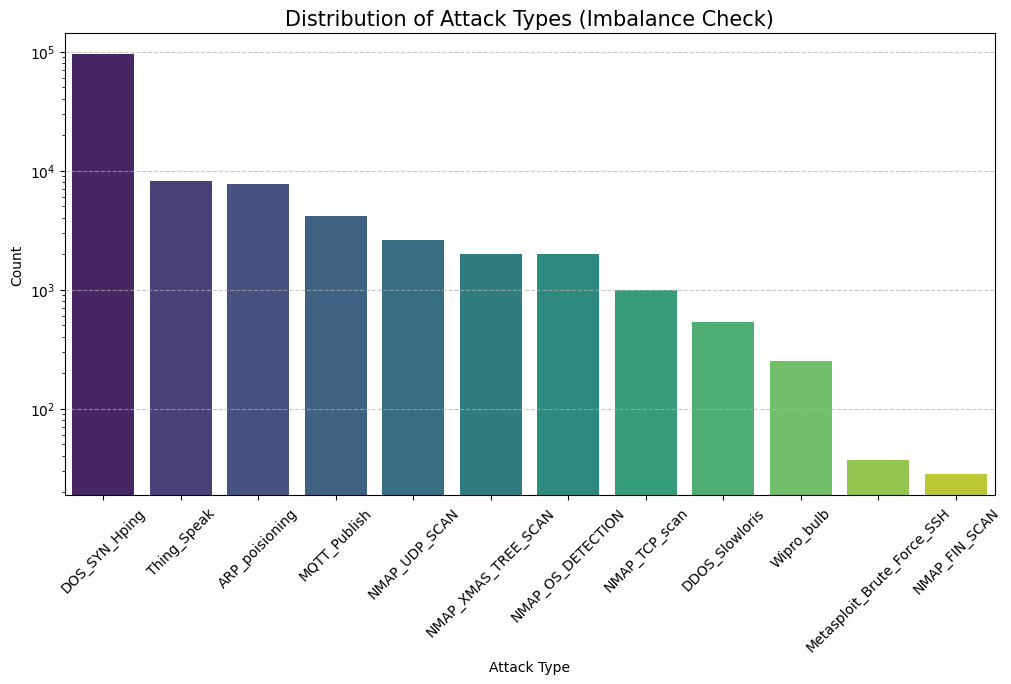

In [12]:
plt.figure(figsize=(12, 6))
order = df_clean[TARGET_COL].value_counts().index

sns.countplot(data=df_clean, x=TARGET_COL, order=order, palette='viridis')
plt.title('Distribution of Attack Types (Imbalance Check)', fontsize=15)
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yscale('log') 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the image
plt.savefig('/Users/shubh/Work/iot_intrusion_detection/images/class_distribution.png')

# Show the image in notebook
plt.show()

# Close the plot to free memory
plt.close()

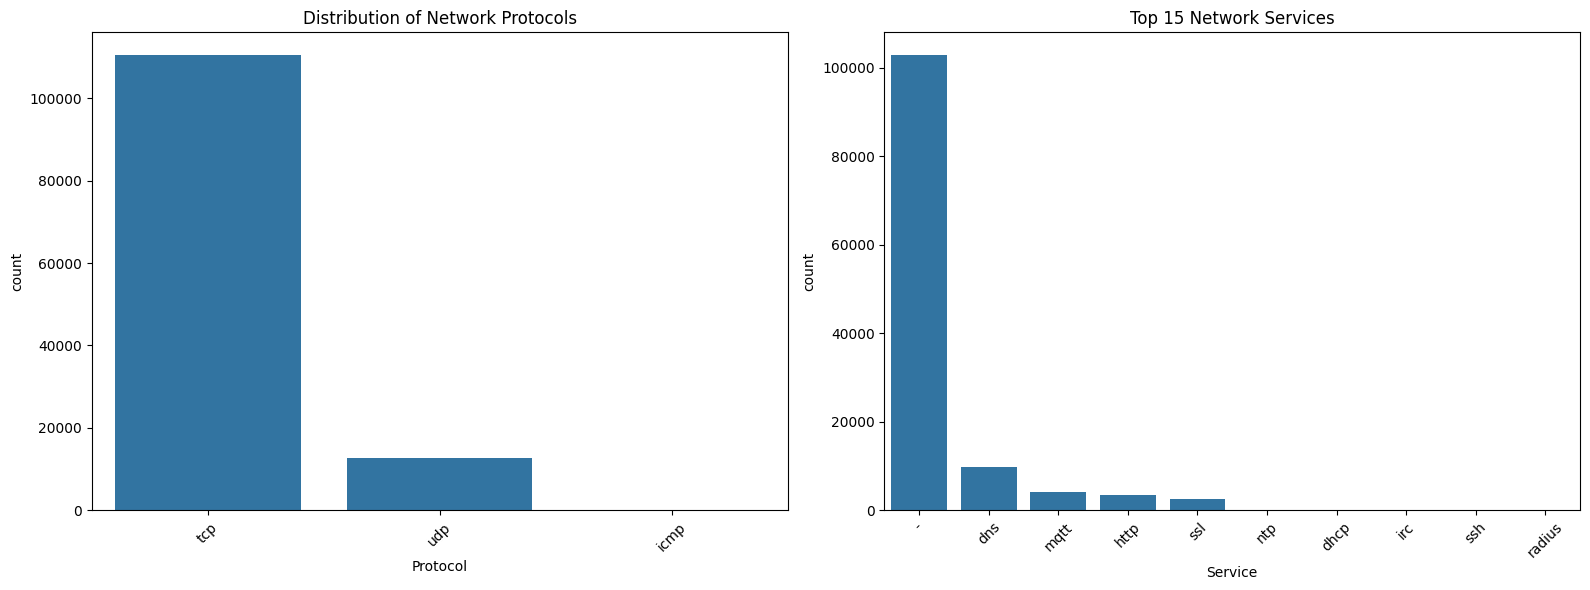

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Protocol Distribution
sns.countplot(data=df_clean, x='proto', ax=ax[0], order=df_clean['proto'].value_counts().index)
ax[0].set_title('Distribution of Network Protocols')
ax[0].set_xlabel('Protocol')
ax[0].tick_params(axis='x', rotation=45)

# Plot 2: Service Distribution (Top 15 only to avoid clutter)
top_services = df_clean['service'].value_counts().nlargest(15).index
sns.countplot(data=df_clean[df_clean['service'].isin(top_services)], x='service', ax=ax[1], order=top_services)
ax[1].set_title('Top 15 Network Services')
ax[1].set_xlabel('Service')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Save the combined figure
fig.savefig('/Users/shubh/Work/iot_intrusion_detection/images/protocol_distribution.png')

# Show the image in notebook
plt.show()

# Close the figure to free memory
plt.close(fig)

In [8]:
# Select only numerical columns for statistics
num_cols = df_clean.select_dtypes(include=[np.number]).columns

# Show description for the first 10 numerical features to keep it short
df_clean[num_cols[:10]].describe().T

,count,mean,std,min,25%,50%,75%,max
id.orig_p,123117.0,34639.258738,19070.620354,0.0,17702.000000,37221.000000,5.097100e+04,6.553500e+04
id.resp_p,123117.0,1014.305092,5256.371994,0.0,21.000000,21.000000,2.100000e+01,6.538900e+04
flow_duration,123117.0,3.809566,130.005408,0.0,0.000001,0.000004,5.000000e-06,2.172834e+04
fwd_pkts_tot,123117.0,2.268826,22.336565,0.0,1.000000,1.000000,1.000000e+00,4.345000e+03
bwd_pkts_tot,123117.0,1.909509,33.018311,0.0,1.000000,1.000000,1.000000e+00,1.011200e+04
fwd_data_pkts_tot,123117.0,1.471218,19.635196,0.0,1.000000,1.000000,1.000000e+00,4.345000e+03
bwd_data_pkts_tot,123117.0,0.820260,32.293948,0.0,0.000000,0.000000,0.000000e+00,1.010500e+04
fwd_pkts_per_sec,123117.0,351806.327665,370764.493152,0.0,74.543538,246723.764706,5.242880e+05,1.048576e+06
bwd_pkts_per_sec,123117.0,351761.960340,370801.484732,0.0,72.889275,246723.764706,5.242880e+05,1.048576e+06
flow_pkts_per_sec,123117.0,703568.288005,741563.422208,0.0,149.087077,493447.529412,1.048576e+06,2.097152e+06
